In [18]:
import requests
from IPython.core.display import HTML
HTML(f"""
<style>
@import "https://cdn.jsdelivr.net/npm/bulma@0.9.4/css/bulma.min.css";
</style>
""")

# Evaluating poses

**Overview**
In this exercise you will compare high-dimensional vectors of human poses (from a dataset of badminton poses) using distance between poses. The dataset contains 18 sample poses, each defined by 25 points $(x_i, y_i)$. Your task is to calculate the Euclidean distance ($L_2$-norm) between all poses.


<article class="message">
    <div class="message-body">
        <strong>Overview of tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#load">Task 1: Load and inspect the data</a>
            </li>
            <li>
            <a href="#inspect">Task 2: Visually inspect and compare poses</a>
            </li>
            <li>
            <a href="#dist">Task 3: Calculate pose distance</a>
            </li>
            <li>
            <a href="#comparison">Task 4: Most similar pose pairs</a>
            </li>
            <li>
            <a href="#comparison2">Task 5: Compare poses</a>
            </li>
        </ul>
    </div>
</article>

The dataset is loaded and stored in an $18\times 50$-dimensional Numpy array. Each row in `poses`
 has the form $x_1, y_1, x_2, y_2, \dots, x_{25}, y_{25}$, i.e. it is a list of $50$ elements constituting $25$ points.

---
**Task 1 (easy): Load and inspect the data💡**
1. Run the cell below to load the data.
2. Print the first pose in the dataset (index 0).

**Note:** Note that the output above is still a 1D array, it is simply printed over multiple lines


---

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import util_poses

poses = np.load("data/poses.npy")

In [20]:
# Get the first pose and print it
# Write your solution here
print(poses[0])

[-27.99571178  -6.48683038  -0.11660905  -1.17064333   0.84333174
  -1.17055863   1.40324612  -0.75536782   1.64424262  -0.39685233
  -0.91658014  -1.19784466  -1.47706657  -0.75565014  -1.63809865
  -0.67290277  -0.0346016   -0.2573026    0.52441385  -0.28487094
   0.92472628   0.2406497    1.08637127   0.87586495  -0.35960773
  -0.2296778   -0.75350502   0.46266449  -0.75767282   1.26336037
 -27.99571178  -6.48683038 -27.99571178  -6.48683038   0.4412623
  -1.52924351  -0.43720223  -1.53048571  -1.23831741   1.26319098
  -1.39460965   1.34502082  -0.67480729   1.34740641   0.68458786
   1.12472817   1.08424651   1.09708925   1.16224962   0.93142511]


The cell below visualises each pose in the dataset:


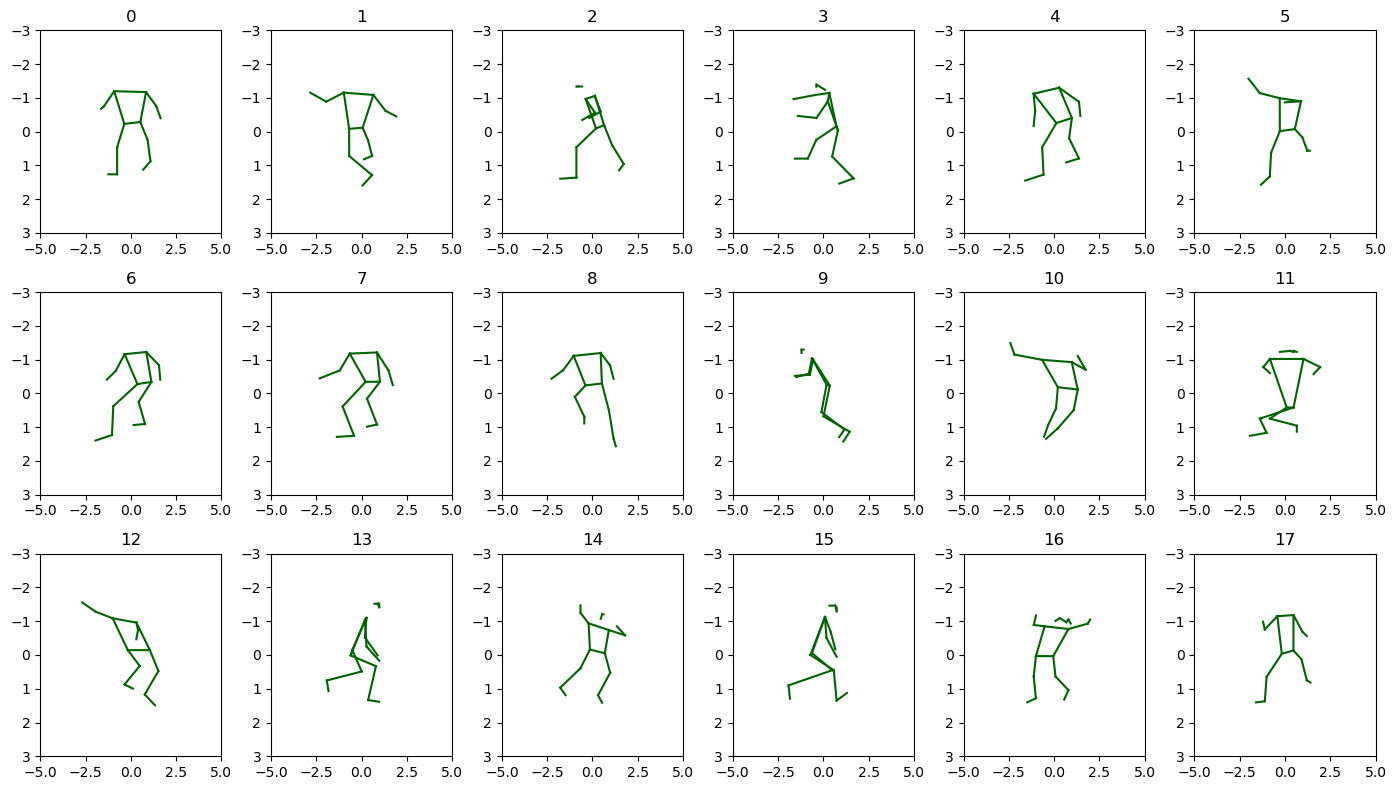

In [21]:
# Create a 6x3 grid of subplots
fig, ax = plt.subplots(3, 6, figsize=(14, 8))

for i, p in enumerate(poses):
    axis = ax[i//6, i%6] # Select the appropriate subplot
    util_poses.plot_single_pose(p, axis)

    axis.set_title(i)
    axis.set_xlim(-5, 5)
    axis.set_ylim(3,-3)


plt.tight_layout()


---
**Task 2 (easy): Visually inspect and compare poses💡**
This task involves visual inspection of the poses.
1. Choose the three pairs of poses that look most similar and note their indices.
2. Choose the three pairs of poses that look least similar and note their indices.


---

In [22]:
# Note the indices of the poses here.
# 13 + 15
# 4 + 6
# 0 + 17



---
**Task 3 (easy): Calculate pose distance👩‍💻📽️**
In this task you will calculate the Euclidean distance ($L_2$ norm) between all the poses.
**Note:** Note that the distance is symmetric, such that the distance between pairs (a, b) and (b, a) are the same.

1. In the cell below, calculate the Euclidean distance between each combination of poses and store the result in an $18\times 18$ matrix called `res`
 (the name is important as the variable is used below) such that the distance between `poses[i]`
 and `poses[j]`
 is in position $i, j$ in the matrix.


---

In [ ]:
# Write your solution here
res = np.linalg.norm(poses[:, None]-poses[None, :], axis=-1)
# easier with two nested for loops

(18, 18)
[[ 0.          3.94894555 39.48790961 48.68814179  2.2974342  30.49232316
   2.50046518  8.18664918 16.04194597 39.97479697 18.85450144 50.53339921
   3.98876851 60.4885524  53.93899284 58.93846009 51.28812314 21.23984003]
 [ 3.94894555  0.         41.15543029 49.59326547  4.85387879 30.96341919
   5.1005766   9.80193363 17.52646092 41.21373621 17.73528295 52.31923972
   4.84507872 62.09792119 55.11513859 60.58113964 52.73725535 22.84982185]
 [39.48790961 41.15543029  0.         27.62459951 39.03579354 48.90704263
  39.03639082 33.42901768 27.68248204  7.14043997 56.02917477 24.91686097
  39.01767413 41.07672114 54.17182484 39.03929275 26.12709761 24.93815922]
 [48.68814179 49.59326547 27.62459951  0.         47.87727812 55.96796764
  48.20659675 43.71581301 39.61031527 26.99272178 62.23221754 38.38915934
  47.65365384 51.52665695 62.57618855 49.74973512 38.18714309 38.2906692 ]
 [ 2.2974342   4.85387879 39.03579354 47.87727812  0.         30.42209054
   2.21147182  7.51188187

The following cell creates an 18x18 distance matrix: 


<Axes: >

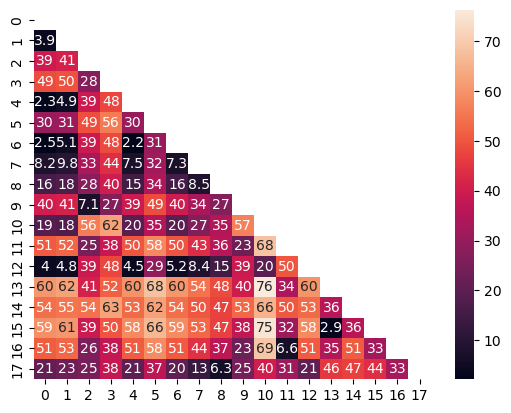

In [24]:
import seaborn as sns
t = np.triu(np.ones_like(res))
sns.heatmap(res, annot=True, mask=t)


---
**Task 4 (medium): Most similar pose pairs👩‍💻**
The **mandatory** part of the exercise has to be entered in [Grasple](https://app.grasple.com/#/courses/10532/ci/733917/diagnoses/12885)
 and requires you to complete question 1.
1. Determine the three most similar pose-pairs using the distances calculated in the distance matrix `res`
 and plot them using the plotting function `plot_pair`
 from the file `util_poses.py`
. The function input is two full pose rows, hence input as e.g `poses[x], poses[y]`
 where `x`
 and `y`
 are indices.
2. Determine the three most dissimilar pose-pairs using the distances calculated in the distance matrix `res`
 and plot them.


---

[2.21147182 2.2974342  2.50046518]
[68.82671465 74.94811034 76.25053411]


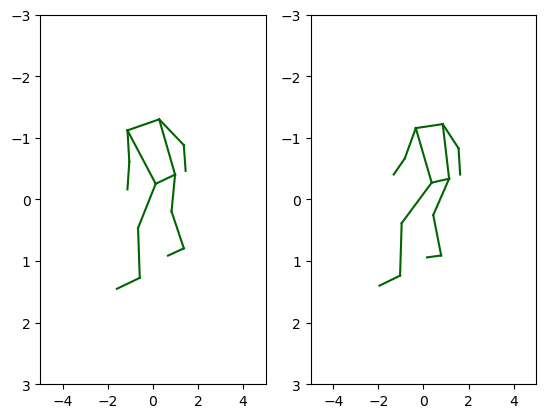

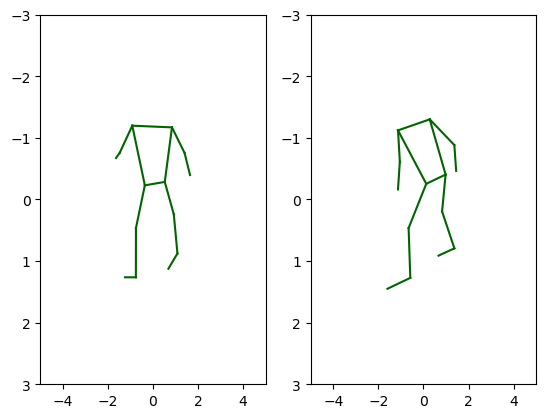

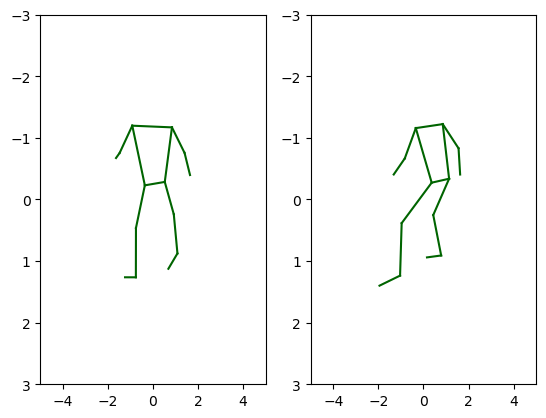

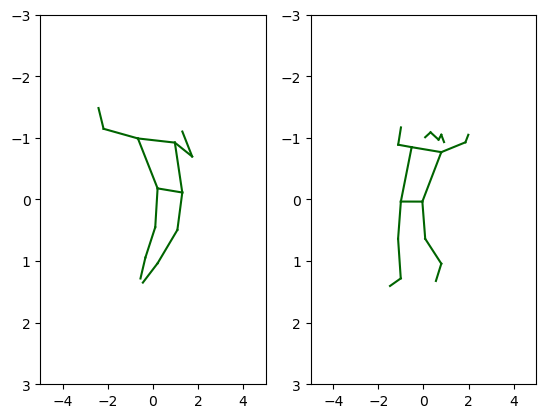

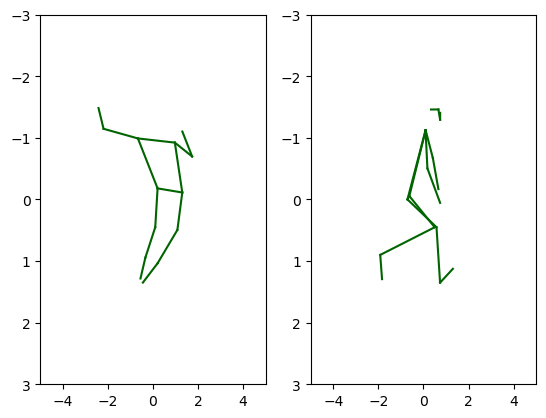

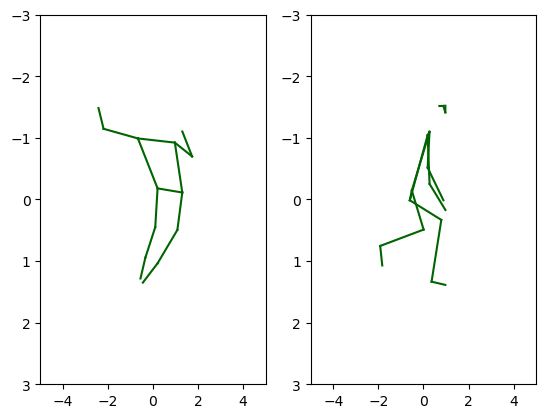

In [69]:
# Write your solution here
mask = np.triu(res) != 0
fixed_result = res[mask]
nonzero_coords = np.argwhere(mask)

a = np.argpartition(fixed_result, 3)[:3]
min_coords = nonzero_coords[a]

print(fixed_result[a])

min_rows, min_cols = min_coords[:, 0], min_coords[:, 1]
for i in range(3):
    util_poses.plot_pair(poses[min_rows[i]], poses[min_cols[i]])

# max distances
max = np.argpartition(fixed_result, -3)[-3:]
max_coords = nonzero_coords[max]

print(fixed_result[max])

max_rows, max_cols = max_coords[:, 0], max_coords[:, 1]
for i in range(3):
    util_poses.plot_pair(poses[max_rows[i]], poses[max_cols[i]])






---
**Task 5 (medium): Compare poses💡📽️**
1. Compare the pose-pairs you chose in [Task 2](#inspect) with the calculated pose-pairs. How well did your intuition match the calculated result?


---

In [0]:
# write your reflections here
# I thought the most similar poses where: 13 + 15, 4 + 6, 0 + 17
# but the calculated result was 4 + 6, 0 + 4, 0 + 6
# So only my pair of 4+6 was correct. 
# It's difficult to tell just by looking at the poses which are actually the closest, 
# and my eyes might notice some similarities that are not included in the distance calculations. 
